<a href="https://colab.research.google.com/github/sundaracharya/CE888/blob/main/lab5/lab_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_wine

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* We have loaded the necessary libraries above
* Now let's load the data

In [ ]:
data = load_wine(as_frame=True)
df = data.data.copy()  # features
# Look at the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)
# and save the label in a column called 'y' in df.
df['y'] =  data.target## YOUR CODE HERE # label
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#How many samples and features are there?

# YOUR CODE HERE
feat_count = len(df.columns)-1
print('number of samples:',len(df), 'number of features:', feat_count)

number of samples: 178 number of features: 13


In [ ]:
# Quiz Q1
# How many instances are there for each class? 
# YOUR CODE HERE
samples_class0 = (df['y']==0).sum()
samples_class1 = (df['y']==1).sum()
samples_class2 = (df['y']==2).sum()
print(samples_class0,samples_class1,samples_class2)

59 71 48
59 71 48


In [ ]:
# Calculate the means, medians, and standard deviations of each feature
# YOUR CODE HERE
df.loc[:, df.columns != 'y'].describe().loc[['mean','std','50%']]
#df.loc[:, df.columns.drop('y')].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000


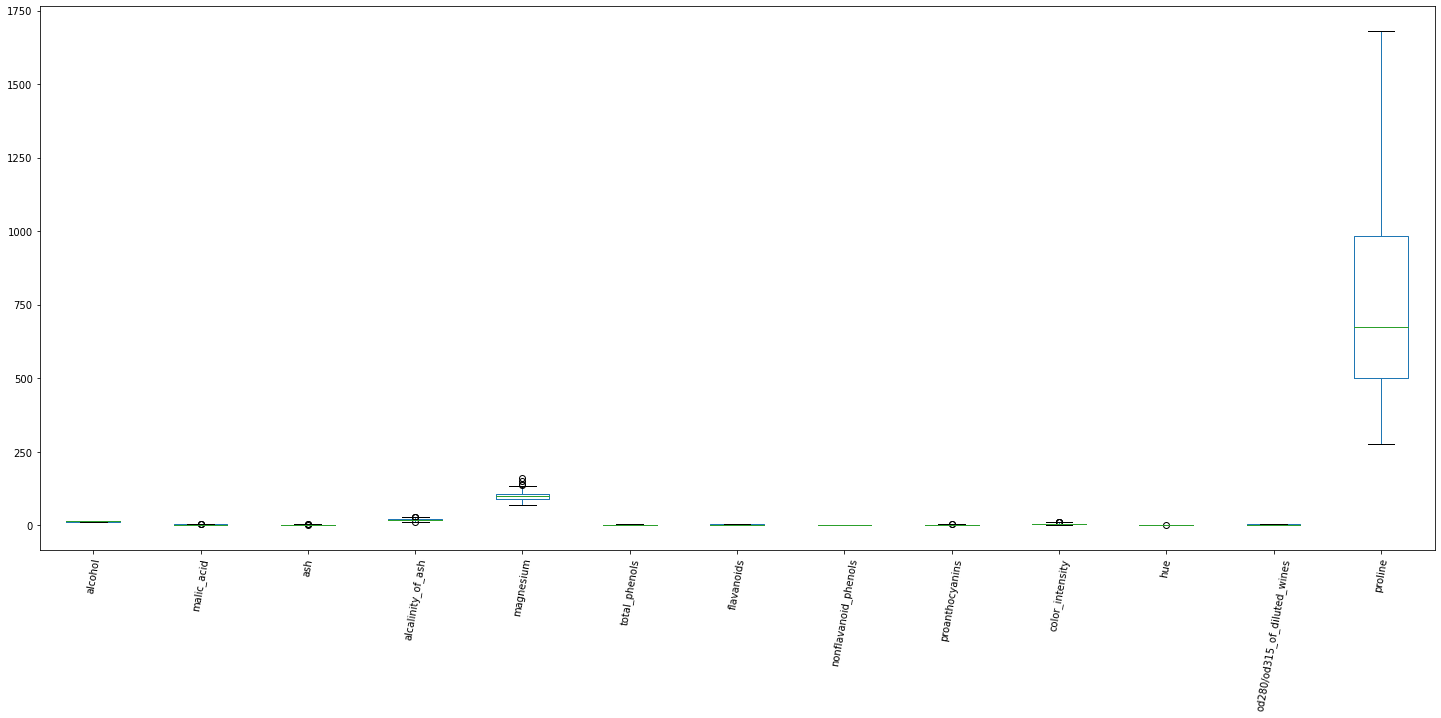

In [ ]:
# Plot a boxplot of each feature (NOT THE LABEL!!) (all in one plot -- you can do this with a single line of code).
# Quiz Q2: Is there any feature that is in a clearly different scale than the others?

# YOUR CODE HERE
df.boxplot(column = df.columns.tolist()[:-1], grid=False,rot=80, figsize=(25,10))
#df.boxplot(column = df.drop('y',axis=1).columns.tolist(),grid=False)

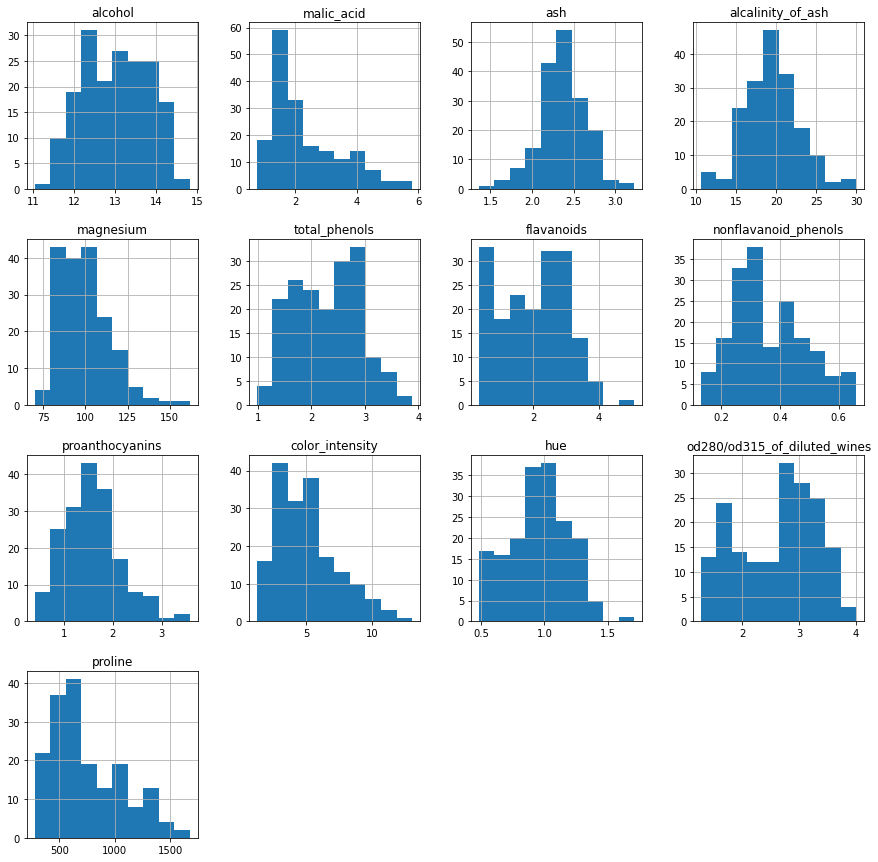

In [ ]:
# Let's look at the distributions of values of our features. Draw a histogram for each of the features

# YOUR CODE HERE
df_feat = df.drop('y',axis=1)
hist= df_feat.hist(figsize=(15,15))

Let's do some multivariate analysis

In [ ]:
# Calculate the correlations between each pair of variables

# YOUR CODE HERE
df_feat.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


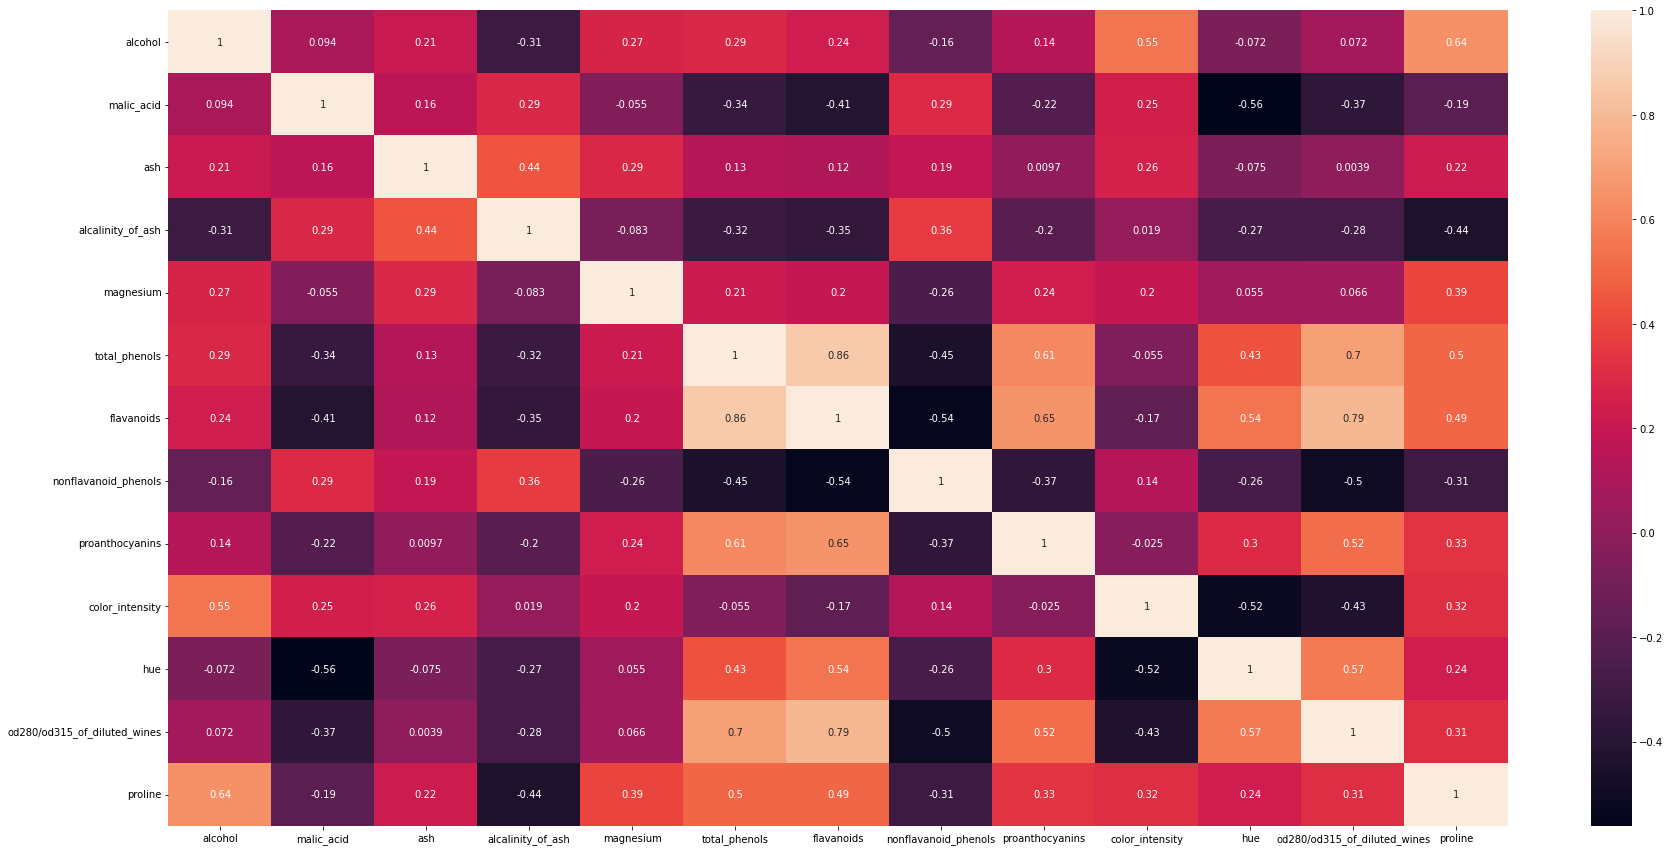

In [ ]:
# Plot a heatmap of the correlations between pairs of FEATURES (i.e., don't include the target!)

# YOUR CODE HERE
plt.figure(figsize=(30,15))
correlation=df_feat.corr()
fig = sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [ ]:
# What is the highest correlation between features?
cor_stack = correlation.unstack()
cor_sorted = cor_stack.sort_values(ascending=False,kind="quicksort")
cor_copy= cor_sorted.copy()
print(cor_copy.head(15))
print('Highest Correlation between features is :',cor_copy[len(df_feat.columns)])

alcohol                       alcohol                         1.000000
malic_acid                    malic_acid                      1.000000
od280/od315_of_diluted_wines  od280/od315_of_diluted_wines    1.000000
hue                           hue                             1.000000
color_intensity               color_intensity                 1.000000
proanthocyanins               proanthocyanins                 1.000000
nonflavanoid_phenols          nonflavanoid_phenols            1.000000
total_phenols                 total_phenols                   1.000000
magnesium                     magnesium                       1.000000
alcalinity_of_ash             alcalinity_of_ash               1.000000
ash                           ash                             1.000000
flavanoids                    flavanoids                      1.000000
proline                       proline                         1.000000
total_phenols                 flavanoids                      0.864564
flavan

You should have noticed that some of the features are highly correlated. 

For this reason, we can run into trouble when trying to train a classifier due to multicolinearity.

Let's do PCA on this dataset to remove these correlations

In [ ]:
# Let's do PCA:
# HINT: I suggest you attempt Q5 of the quiz and then use the function you developed
#       in this and some of the following cells.

# 1. Standardise your data using a StandardScaler. Make sure you're not scaling the 'y'!

# YOUR CODE HERE

# 2. Do PCA with 2 components. How much variance is retained from the original dataset?

# YOUR CODE HERE


In [ ]:
# Plot your two components, using the label from the data to colour the points

# YOUR CODE HERE


In [ ]:
# How many components do you need to keep at least 85% of the variance in the dataset? (Q6)

# YOUR CODE HERE


In [ ]:
# How much variance is retained if we do PCA with 3 components? (Q7)

# YOUR CODE HERE


## Clustering

Let's see how many clusters does K-Means find.



In [ ]:
# Use the elbow method to select the number of clusters in your data using 3 PCs.

# YOUR CODE HERE


In [ ]:
# Now use the silhouette score to choose between the two candidate k values from the previous cell

# YOUR CODE HERE


In [ ]:
# Visualise the first two pcs (using a scatterplot) using the labels from KMeans with your chosen value of k

# YOUR CODE HERE


Now we can try to understand our clusters.

In [ ]:
# In the original (before PCA and before standardisation) dataframe, add a column called 'cluster' that contains
# the cluster assignment from above

# YOUR CODE HERE


In [ ]:
# Do a boxplot of each feature, separating between clusters

# YOUR CODE HERE


Write your observations here.
For example: is there a clear difference between the clusters in terms of alcohol content? What about flavanoids?

In [ ]:
# Feel free to keep playing with the data here!

#From lab quiz only

Write a function that receives as input a dataframe and a number between 0--1 (the percentage of variance from the original dataset to retain).

The function should first standardise the data using a standard scaler and then apply PCA (to ensure the automatic marking works, make sure that you set the random seed of PCA at 100), keeping the variance specified in the 'var' parameter. The default value for the variance should be 50%.

Assume that the dataframe might (or not!) have a column that contains the label. If such a column exists, it will always be called 'y'. This column should NOT be transformed, but you should still return it with the processed data (append it at the end of the array that you're returning). If the column does not exist, you need to just scale and transform the rest of the data.

Make sure that you're importing the libraries/functions you need for your function.

In [ ]:
# Add your libraries here
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def std_pca(df, var=0.5): # define inputs: dataframe and variance
    # Your code here
    y = False
    if 'y' in df.columns:
        y = True
        x = df.drop('y', axis=1, inplace=False)
    else:
        x = df.copy()
    x_stdScaler = StandardScaler().fit_transform(x)
    pca = PCA(n_components=var, random_state=100)
    pca_data = pca.fit_transform(x_stdScaler)
    if y:
        return np.concatenate((pca_data, df['y'].values.reshape(-1, 1)), axis=1)
    return pca_data # and here
